# Iris Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

X = iris.data[:, :2] # sepal length, sepal width
y = iris.target

print(X.shape)
print(y.shape)


(150, 2)
(150,)


In [ ]:
print(X[y == 0].shape)

(50, 2)


### Graphing Iris Datapoints

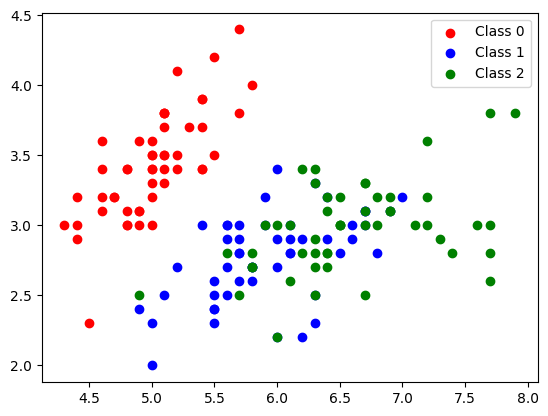

In [15]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1")
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color="green", label="Class 2")
plt.legend()
plt.show()

### Training and testing data split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")


X train shape: (90, 2)
X test shape: (60, 2)
y train shape: (90,)
y test shape: (60,)


## Model to predict iris class

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

def metrics(y, y_hat):
    # TP, TN, FP, FN
    TP = np.sum(y+y_hat == 2) # y is 1 and y_hat is 1
    TN = np.sum(y+y_hat == 0) # Both are 0
    FP = np.sum((y == 0) & (y_hat == 1)) # predicted 1, actually 0
    FN = np.sum((y == 1) & (y_hat == 0)) # predicted 0, actually 1

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    ## We care about sensitivity the most in a medical scenario.
    ## IN a medical case, it's infinitely better to have more false alarms than cause a death by missed detection
    sensitivity = TP / (TP + FN)
    precision = TP / (TP + FP)

    return accuracy

    '''
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Precision: {precision}")
    '''

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print(f"Training accuracy: {metrics(y_train, y_hat_train)}")
print(f"Testing accuracy: {metrics(y_test, y_hat_test)}")

Training accuracy: 1.0
Testing accuracy: 0.9696969696969697
